## Inspect results

In [6]:
b = '/Users/nicholassofroniew/Documents/DATA-proteins/proteins'

In [7]:
from pandas import read_csv
from os.path import join
import matplotlib.pyplot as plt
from glob import glob
from pandas import DataFrame
%matplotlib inline

In [103]:
results = read_csv(join(b,'models-lstm3D-2/model-0030','results.csv'))

In [173]:
results = read_csv(join(b,'models-lstmAng1/model-0040','results.csv'))

In [174]:
results

,Unnamed: 0,RMSD,bond_angle,dRMSD,torsion_angle
0,0,36.215348,1.501467,12.881540,8.347579
1,1,39.373111,1.480187,16.831565,8.755664
2,2,30.426320,1.755600,14.499161,8.619572
3,3,29.485684,1.821223,15.560624,8.403900
4,4,28.417080,1.691239,13.741161,8.422063
5,5,68.684299,1.862497,28.472463,12.058689
6,6,46.801127,2.129198,19.242576,9.670115
7,7,31.790140,1.702211,12.639806,8.424801
8,8,34.423228,1.639821,12.857780,8.509566
9,9,66.152521,2.152304,27.441315,13.084841


In [175]:
results.mean()

Unnamed: 0       609.500000
RMSD              90.370708
bond_angle         1.475744
dRMSD             51.990603
torsion_angle     23.199252
dtype: float64

In [153]:
train = read_csv(join(b,'models-lstm3D-2','train.csv'))
val =  read_csv(join(b,'models-lstm3D-2','val.csv'))

In [154]:
train = train[39156:]

In [176]:
train = read_csv(join(b,'models-lstmAng1','train.csv'))
val =  read_csv(join(b,'models-lstmAng1','val.csv'))

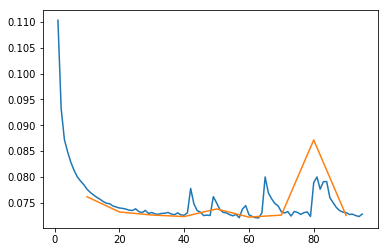

In [177]:
plt.plot(train.groupby('epoch').mean().loss);
plt.plot(val.groupby('epoch').mean().loss);

### look at ramachandran plots for predicted

In [37]:
files = glob(join(b,'val','*.csv'))
dfVal = DataFrame([])
ind = 0
for f in files:
    df = read_csv(f)
    df['id'] = ind
    dfVal = dfVal.append(df)
    ind = ind + 1

In [160]:
#files = glob(join(b,'models-lstm3D-2/model-0030','predict*.csv'))
files = glob(join(b,'models-lstmAng1/model-0040','predict*.csv'))
dfPred = DataFrame([])
ind = 0
for f in files:
    df = read_csv(f)
    df['id'] = ind
    dfPred = dfPred.append(df)
    ind = ind + 1

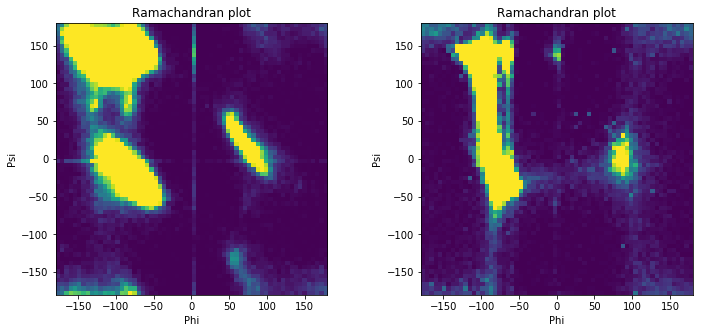

In [161]:
from numpy import histogram2d
plt.figure(figsize=(12,5))
plt.subplot(121)
heatmap, xedges, yedges = histogram2d(-dfVal.torsion_angle[2::3], dfVal.torsion_angle[1::3], bins=(64,64), range = [[-180, 180], [-180, 180]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap/heatmap.max() 
# Plot heatmap
plt.title('Ramachandran plot')
plt.ylabel('Psi')
plt.xlabel('Phi')
plt.imshow(heatmap, extent=extent, clim=[0, .01])
plt.xlim([-180, 180]);
plt.ylim([-180, 180]);

plt.subplot(122)
heatmap, xedges, yedges = histogram2d(-dfPred.torsion_angle[2::3], dfPred.torsion_angle[1::3], bins=(64,64), range = [[-180, 180], [-180, 180]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap/heatmap.max() 
# Plot heatmap
plt.title('Ramachandran plot')
plt.ylabel('Psi')
plt.xlabel('Phi')
plt.imshow(heatmap, extent=extent, clim=[0, .01])
plt.xlim([-180, 180]);
plt.ylim([-180, 180]);


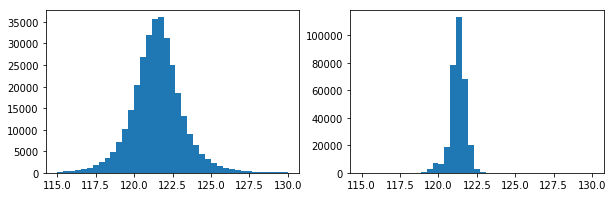

In [162]:
from numpy import linspace
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(dfVal.bond_angle[::3], bins=linspace(115,130,40));
plt.subplot(122)
plt.hist(dfPred.bond_angle[::3], bins=linspace(115,130,40));

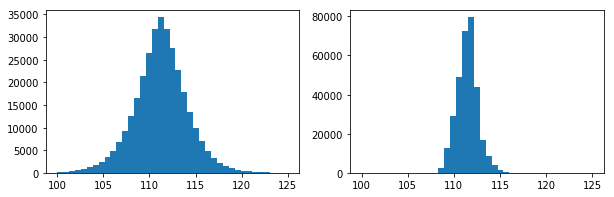

In [163]:
from numpy import linspace
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(dfVal.bond_angle[1::3], bins=linspace(100,125,40));
plt.subplot(122)
plt.hist(dfPred.bond_angle[1::3], bins=linspace(100,125,40));

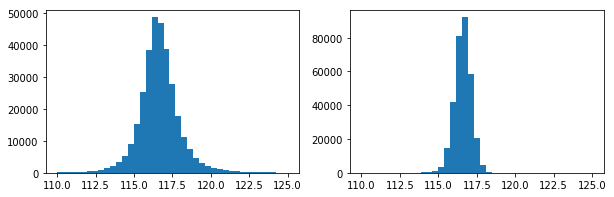

In [164]:
from numpy import linspace
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(dfVal.bond_angle[2::3], bins=linspace(110,125,40));
plt.subplot(122)
plt.hist(dfPred.bond_angle[2::3], bins=linspace(110,125,40));

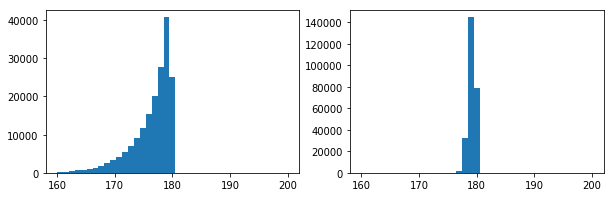

In [168]:
from numpy import linspace
plt.figure(figsize=(10,3))
plt.subplot(121)
ang = dfVal.torsion_angle[::3]
plt.hist(ang, bins=linspace(160,200,40));
plt.subplot(122)
ang = dfPred.torsion_angle[::3]
plt.hist(ang, bins=linspace(160,200,40));

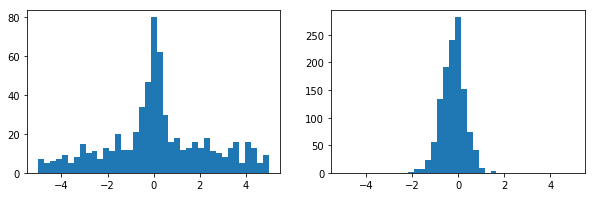

In [169]:
from numpy import linspace, nan
plt.figure(figsize=(10,3))
plt.subplot(121)
ang = dfVal.torsion_angle[::3]
ang[dfVal.res[::3] == 0] = -100
ang[ang>180] = ang[ang>180]-360
plt.hist(ang, bins=linspace(-5,5,40));
plt.subplot(122)
ang = dfPred.torsion_angle[::3]
ang[ang>180] = ang[ang>180]-360
plt.hist(ang, bins=linspace(-5,5,40));

## 3D plots

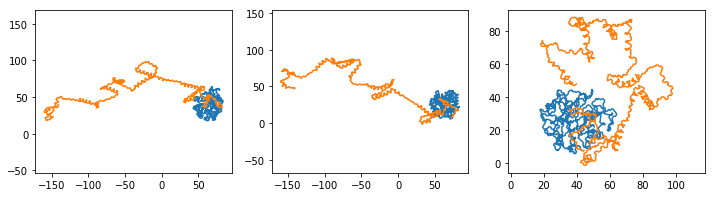

In [167]:
protein_id = 10

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.plot(dfVal[dfPred.id==protein_id].x, dfVal[dfPred.id==protein_id].y);
plt.plot(dfPred[dfPred.id==protein_id].x, dfPred[dfPred.id==protein_id].y);
plt.axis('equal')
plt.subplot(132)
plt.plot(dfVal[dfPred.id==protein_id].x, dfVal[dfPred.id==protein_id].z);
plt.plot(dfPred[dfPred.id==protein_id].x, dfPred[dfPred.id==protein_id].z);
plt.axis('equal')
plt.subplot(133)
plt.plot(dfVal[dfPred.id==protein_id].y, dfVal[dfPred.id==protein_id].z);
plt.plot(dfPred[dfPred.id==protein_id].y, dfPred[dfPred.id==protein_id].z);
plt.axis('equal');

In [129]:
dfPred[dfPred.id==protein_id]

,Unnamed: 0,bond_angle,torsion_angle,x,y,z,id
0,0,0.935483,0.826557,72.586000,44.090000,7.476000,10
1,1,111.101440,-2.965477,73.748000,43.226000,7.485000,10
2,2,116.437400,156.821140,73.574000,41.978000,8.345000,10
3,3,121.051420,178.219710,74.349900,40.940556,8.046507,10
4,4,109.363280,-98.532020,74.294464,39.710260,8.827834,10
5,5,116.831345,133.302860,75.434440,39.702637,9.840863,10
6,6,121.280260,179.647720,75.126190,39.363186,11.088296,10
7,7,109.989600,-89.359560,76.142020,39.316490,12.133181,10
8,8,117.561760,118.924480,76.772880,37.929070,12.185336,10
9,9,121.793080,179.930900,78.078210,37.837944,11.952820,10
